<a href="https://colab.research.google.com/github/marciamelo/Notebooks/blob/main/Aula2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com planilhas tipo xlsx

In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [ ]:
#Unindo os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Exibe os tipos de dados das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Exibe 5n exemplos aleatórios de dados do df
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
91,Recife,2019-01-01,150.58,982,6
17,Natal,2018-02-18,276.00,854,3
59,Salvador,2019-01-01,138.27,1034,2
131,Salvador,2019-03-02,63.48,1037,3
96,Fortaleza,2019-01-01,23.31,1004,4


In [ ]:
#Alterar tipo de dado da coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Faz a contagem de campos nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substitui os valores nulos pelas médias
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Faz a contagem de campos nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substitui os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apaga as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apaga as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Remove linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [ ]:
#Cria a coluna Receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retorna a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retorna a menor receita
df["Receita"].min()

3.34

In [ ]:
#Traz as top 3 maiores da coluna indicada
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#Traz as top 3 menores receitas da coluna indicada
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupa por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordena os top 10 do conjunto de dados com base na receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#Trabalhando com datas

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupa por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Cria uma nova coluna por ano
df["Ano Venda"] = df["Data"].dt.year

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda
154,Natal,2019-01-02,9.58,1037,1,9.58,2019
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019
70,Fortaleza,2019-01-01,79.57,1002,5,397.85,2019
29,Recife,2019-01-01,10.18,980,8,81.44,2019
69,Recife,2019-01-01,38.83,981,1,38.83,2019


In [ ]:
#Extrai mês e dia
df["mes_venda"], df["dia venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia venda
136,Recife,2019-03-02,39.09,982,4,156.36,2019,3,2
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
35,Aracaju,2018-01-01,40.60,1520,3,121.80,2018,1,1
224,Natal,2019-01-02,178.30,1035,3,534.90,2019,1,2
67,Aracaju,2018-01-01,78.13,1521,4,312.52,2018,1,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2019,3,2
96,Salvador,2019-01-01,42.94,1034,3,128.82,2019,1,1
0,Salvador,2018-01-01,31.06,1037,3,93.18,2018,1,1
112,Natal,2019-01-02,43.00,1036,3,129.00,2019,1,2
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,2018,1,1


In [ ]:
#Cria a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia venda,trimestre_vendas
49,Natal,2019-04-01,831.00,852,2,1662.00,2019,4,1,2
31,Aracaju,2018-01-01,171.16,1520,9,1540.44,2018,1,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,1
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018,1,1,1
74,Natal,2019-03-10,303.00,854,3,909.00,2019,3,10,1
55,Natal,2019-01-08,859.00,854,4,3436.00,2019,1,8,1
233,Salvador,2019-01-03,172.40,1036,2,344.80,2019,1,3,1
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,2019,1,1,1
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,3
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,2018,1,1,1


In [ ]:
#Filtra as vendas de 03/2019
vendas_mar_19 = df.loc[(df["Ano Venda"] == 2019) & (df["mes_venda"] == 3)]

In [ ]:
vendas_mar_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia venda,trimestre_vendas
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,2019,3,2,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,1
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,2019,3,2,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,1


#Visualização de dados

In [ ]:
#Calcula total de vendas
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

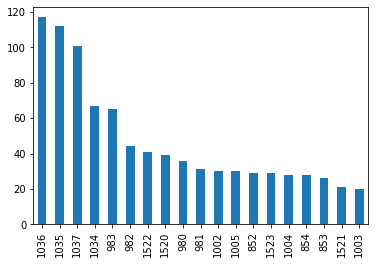

In [ ]:
#Exibe em um gráfico o total de vendas
df["LojaID"].value_counts(ascending=False).plot.bar();

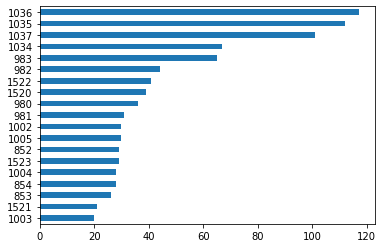

In [ ]:
#Exibe em um gráfico o total de vendas
df["LojaID"].value_counts(ascending=True).plot.barh();

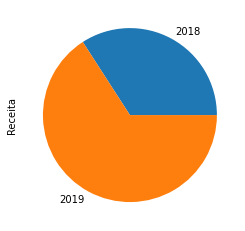

In [ ]:
#Exibe em um gráfico o total de vendas
df.groupby(["Ano Venda"])["Receita"].sum().plot.pie();

In [ ]:
#Importa a biblioteca do matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn")

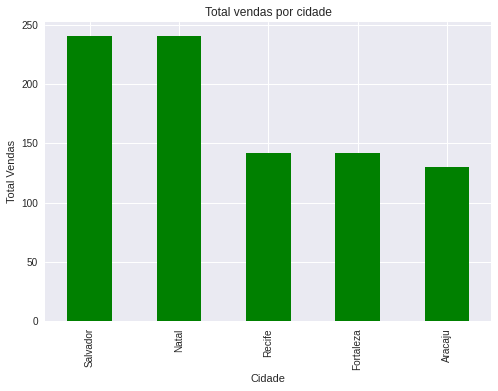

In [ ]:
#Adiciona titulo e altera o valor dos eixos
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");